## Mall Customer Segmentation
   Mall or shopping centers are places that attract a variety of customers with diverse preferences, habits and needs. To improve marketing efficiency, customer experience and sales, it is important for shopping centers to understand their customers better. One way to achieve this is by segmenting customers.
   
   The purpose of this project is to identify customer segmentation and design the right marketing strategy to increase sales performance.

In [1]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read dataset
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Exploratory Data Analyst

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

from the info above, in this data contain 200 rows and 5 columns

In [5]:
# Checking Missing Value
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

in this data, not yet missing value. so we can continue to the next step

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


    From descriptive statistics above, we know that :
    1. youngest customer is 18 yo and oldest customer is 70 yo, with average of customer age is 38,8 yo.
    2. annual income all customer between 15k - 137k (in dollars), with average annual income is 60,56k (in dollar)
    3. spending score between 1-99, with average spending score is 50,2

## Data Visualization

In [7]:
# Data Visualization
df.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

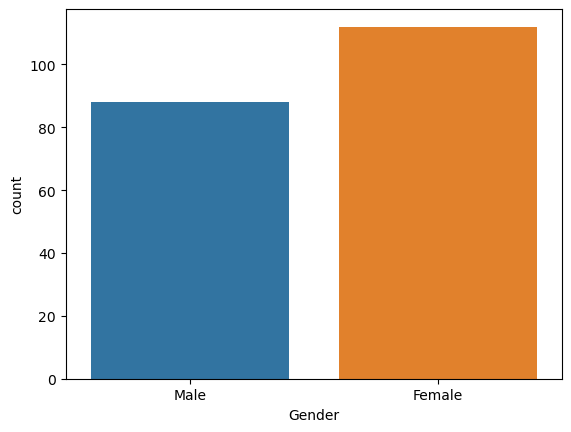

In [8]:
sns.countplot(x = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

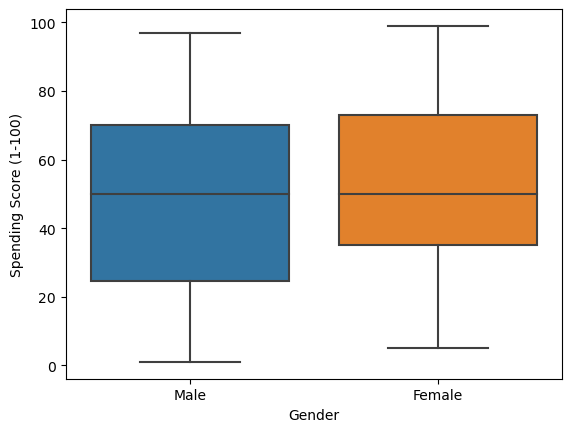

In [9]:
sns.boxplot(x='Gender',y=df['Spending Score (1-100)'], data=df)

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

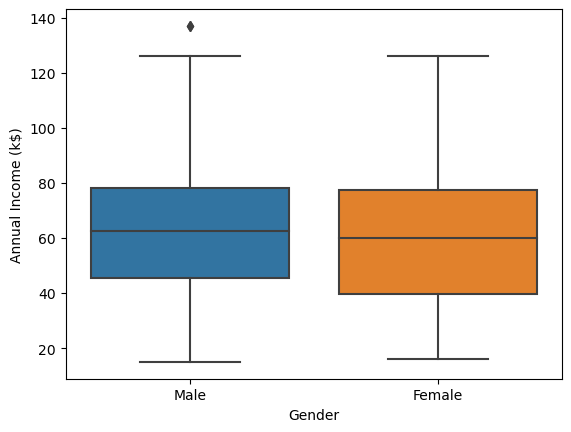

In [10]:
sns.boxplot(x='Gender',y=df['Annual Income (k$)'], data=df)

    From all of visualization above, we found several insight. there are :
    1. Female customer >  male customer, I think its because some reasons like female (or wife) managed all of shoping activity in the family
    2. spending score of female more than male's spending score
    3. Male annual income > female annual income, its maybe because all of male is working people but several female just a housewife or have no work.
    4. there are one outlier in male's annual income at >120k (in dollars) buat I decided to keep that data because possible if someone have annual income >120k dollars 

In [11]:
df_2 = df.drop(['CustomerID'], axis = 1)
df_2

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


    for further analyst, we dropped Customer ID Columns because it's not very useful.

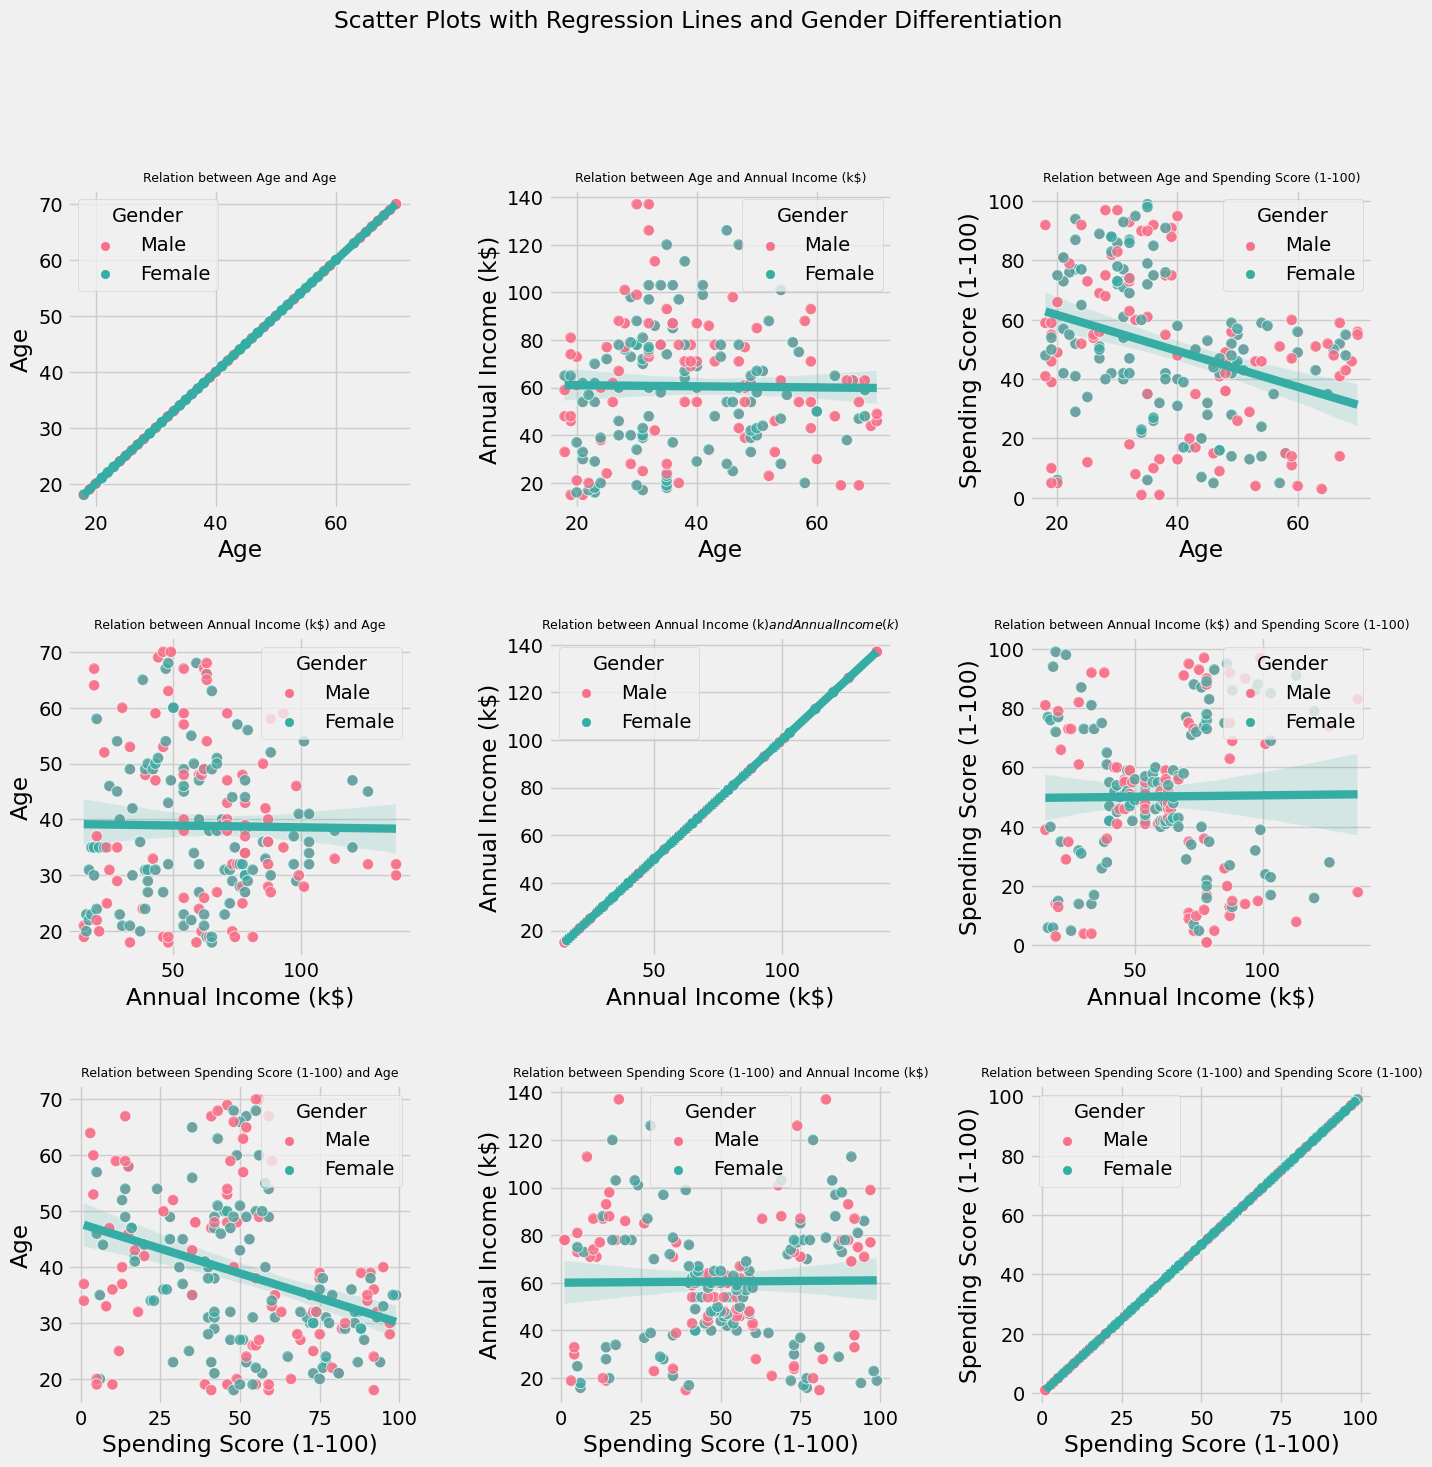

In [12]:
# setting style and pallete
plt.style.use("fivethirtyeight")
plt.figure(1, figsize=(15, 15))
n = 0
palette = sns.color_palette("husl", 2)

# create for loop
for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.4, wspace=0.4)
        
        # Scatter plot with regression line
        sns.regplot(x=i, y=y, data=df, scatter_kws={'color': palette[0]}, line_kws={'color': palette[1]})
        
        # Add points with different colors based on Gender
        sns.scatterplot(x=i, y=y, hue='Gender', data=df, palette=palette, s=70, alpha=0.7)
        
        plt.xlabel(i)
        plt.ylabel(y)
        plt.title(f'Relation between {i} and {y}', fontsize = 9)

# plot visualization
plt.suptitle('Scatter Plots with Regression Lines and Gender Differentiation', y=1)
plt.show()


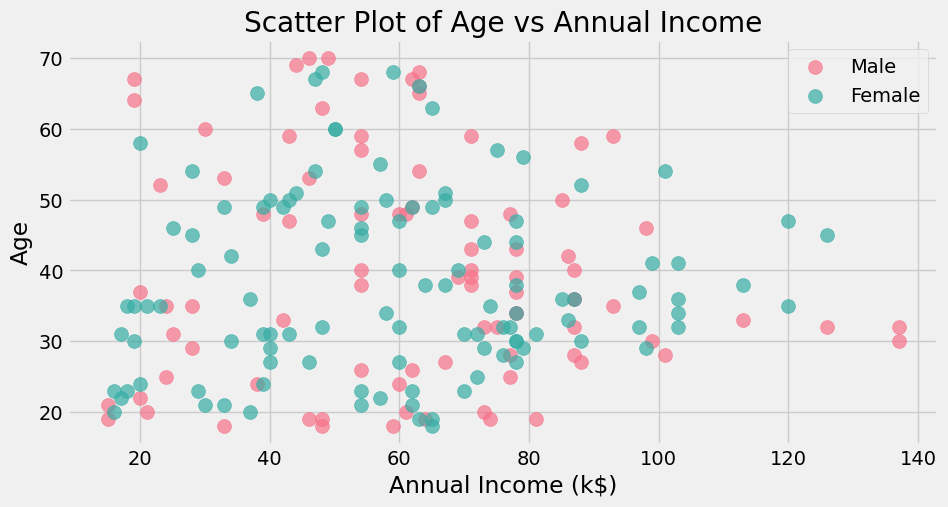

In [13]:
# setting pallete
plt.figure(1, figsize=(10, 5))
palette = sns.color_palette("husl", 2)

# create for loop
for x in ["Male", "Female"]:
    subset = df[df["Gender"] == x]
    plt.scatter(x="Annual Income (k$)", y="Age", data=subset, s=100, alpha=0.7, label=x, c=palette.pop(0))


# plot visualization
plt.xlabel("Annual Income (k$)")
plt.ylabel("Age")
plt.title("Scatter Plot of Age vs Annual Income")
plt.legend()
plt.show()

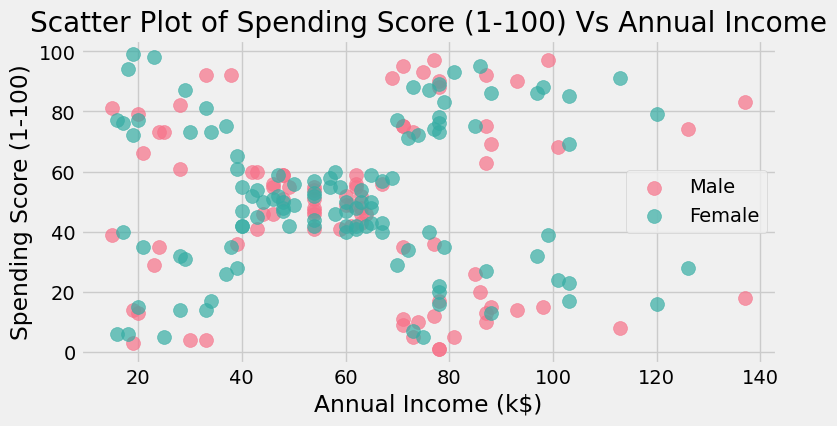

In [14]:
# setting pallete
plt.figure(1, figsize=(8, 4))
palette = sns.color_palette("husl", 2)

# create for loop
for x in ["Male", "Female"]:
    subset = df[df["Gender"] == x]
    plt.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", data=subset, s=100, alpha=0.7, label=x, c=palette.pop(0))

# plot visualization
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Scatter Plot of Spending Score (1-100) Vs Annual Income")
plt.legend()
plt.show()

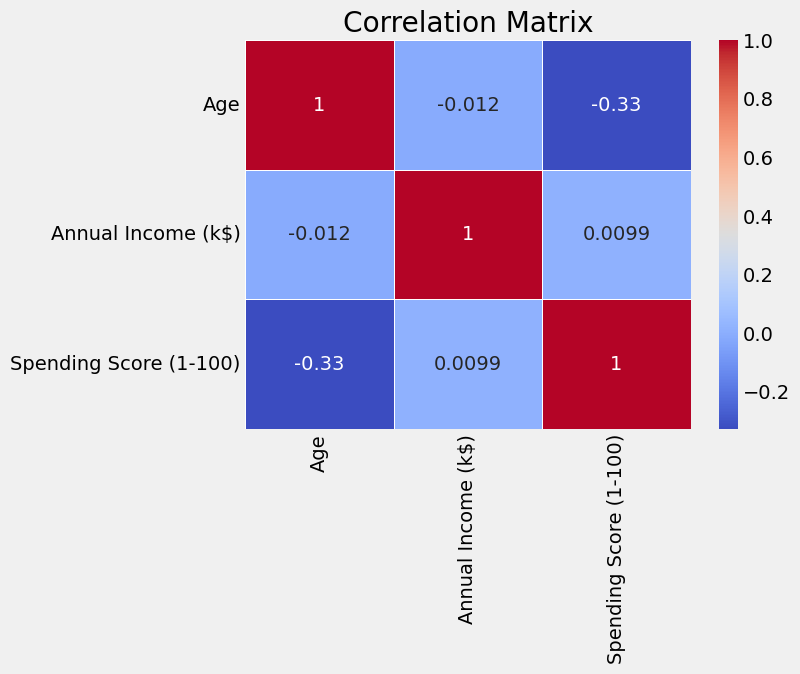

In [15]:
# Correlation Analysis
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

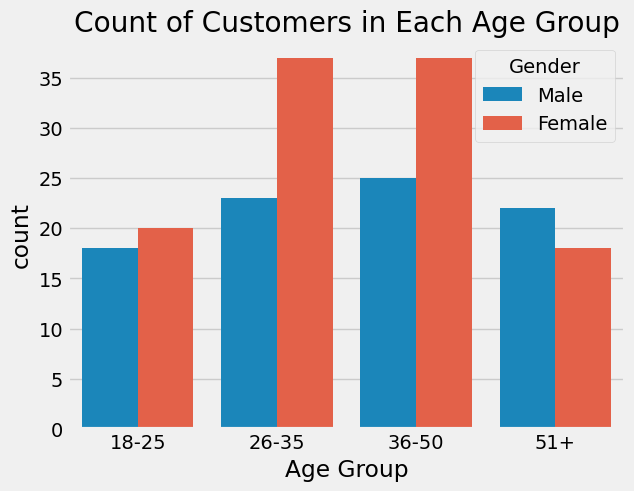

In [16]:
# Age Group Analysis
bins = [0, 25, 35, 50, 100]
labels = ['18-25', '26-35', '36-50', '51+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
sns.countplot(x='Age Group', data=df, hue='Gender')
plt.title('Count of Customers in Each Age Group')
plt.show()

## Segmentation Analyst

In [17]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Segmentation Age and Annual Income

In [18]:
x = df[["Age",'Annual Income (k$)', 'Spending Score (1-100)']]
Age_a = x.iloc[:,:2]
scaler = StandardScaler()
Age_a_scaled = scaler.fit_transform(Age_a)
Age_a_scaled[:5]

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033]])

In [19]:
WCSS = []
for i in range(1,10):
    Kmeans = KMeans(i)
    Kmeans.fit(Age_a_scaled)
    wcss_iner = Kmeans.inertia_
    WCSS.append(wcss_iner)

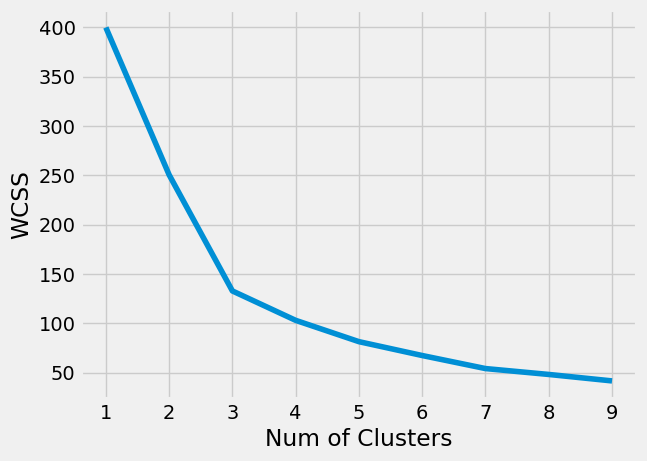

In [20]:
# Plotting WCSS
num_clusters = range(1,10)
plt.plot(num_clusters, WCSS)
plt.xlabel("Num of Clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
# Fitting KMeans with 7 clusters
n_Kmeans = KMeans(7,random_state=42)
n_Kmeans.fit(Age_a_scaled)
x["Clusters"] = n_Kmeans.fit_predict(Age_a_scaled)

    I scaled the 'Age' and 'Annual Income' features to find out the best number of groups, then I used the K-means algorithm to predict these groups. Once I got the predicted groups, I matched them back to the original dataset ('x') without scaling for visualization and plotting the cluster segments.

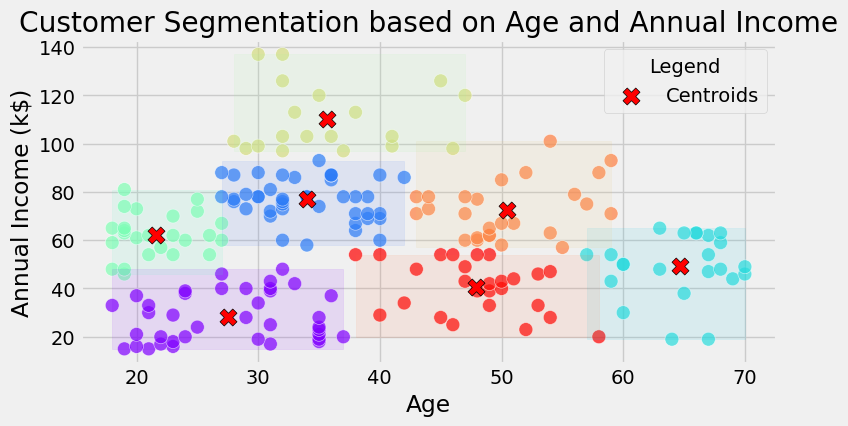

In [22]:
# Create and fit the StandardScaler
scaler = StandardScaler()
scaler.fit(Age_a)

# Transform the centroids back to the original scale
centroids_unscaled = scaler.inverse_transform(n_Kmeans.cluster_centers_)

# Plotting the Scatter with Centroids and Shadows using unscaled features
plt.figure(figsize=(8, 4))

# Scatter plot with unscaled features
scatter = plt.scatter(x["Age"], x["Annual Income (k$)"], c=x["Clusters"],s=100, cmap="rainbow", alpha=0.7, edgecolors="w", linewidth=0.5)

# Plotting unscaled centroids
plt.scatter(centroids_unscaled[:, 0], centroids_unscaled[:, 1], c='red', marker='X', s=150, label='Centroids', edgecolors='black', zorder=10)

# Plotting shadows
for cluster_label in x['Clusters'].unique():
    cluster_points = x[x['Clusters'] == cluster_label][['Age', 'Annual Income (k$)']]
    plt.fill_betweenx(cluster_points['Annual Income (k$)'], cluster_points['Age'].min(), cluster_points['Age'].max(),
                      alpha=0.1, color=plt.cm.rainbow(cluster_label / len(centroids_unscaled)))

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Customer Segmentation based on Age and Annual Income")

# Add legend
plt.legend(title="Legend")

# Show plot
plt.show()

There are 7 segment were found. The detail of segment are :
1. Cluster 1 : Young and Low Income
    - Age interval = 18-38 yo
    - Annual income between 18-45k (in dollars)
    - This segment contain young people with annual income relativity is lower
2. Cluster 2 : Young and Moderate-Income
    - Age interval = 18-30 yo
    - Annual income between 42-80k (in dollars)
    - This segment contain young people with moderat annual income
3. Cluster 3 : Middle Age and Moderat-High Income
    - Age interval = 27-42 yo
    - Annual income between 60-90k (in dollars)
    - This segment contain midle age people with moderat to high annual income
4. Cluster 4 : Middle Age and High Income
    - Age interval = 28-48 yo
    - Annual income between 100-140k (in dollars)
    - The cluster represent midle age individual with high annual income
5. Cluster 5 : Older and Lower Income
    - Age interval = 38-58 yo
    - Annual income between 20-58k (in dollars)
    - This segment represent older people with lower annual income
6. Cluster 6  : Older and High-Moderate Income
    - Age interval = 43-59yo
    - Annual income between 58-100k (in dollars)
    - This segment include older people with high-moderate income
7. Cluster 7 = Senior and Low-Moderate Income
    - Age interval = 57-70 yo
    - Annual income between 20-65k (in dollars)
    - This segment include senior people with low-moderate income


CONCLUTION
Based on segmentation, clustering algorithm has identified unique group with variying age and income characteristic. From the clustering, we found valuable insight for company. Companies can improve their marketing by dividing their customers into different groups based on their characteristics or behaviors. By doing this, they can create personalized offers and services that cater to the specific needs of each customer group. This approach helps companies make better decisions and enhance the overall customer experience.

### Segmentation Age and Spending Score 

In [23]:
Age_s = x.iloc[:,[0,-2]]
scaler = StandardScaler()
Age_s_scaled = scaler.fit_transform(Age_s)
Age_s_scaled[:5]

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992]])

In [24]:
# Creating WCSS2 for age and spending score
WCSS2 = []
for i in range(1,10):
    Kmeans = KMeans(i)
    Kmeans.fit(Age_s_scaled)
    wcss_iner = Kmeans.inertia_
    WCSS2.append(wcss_iner)

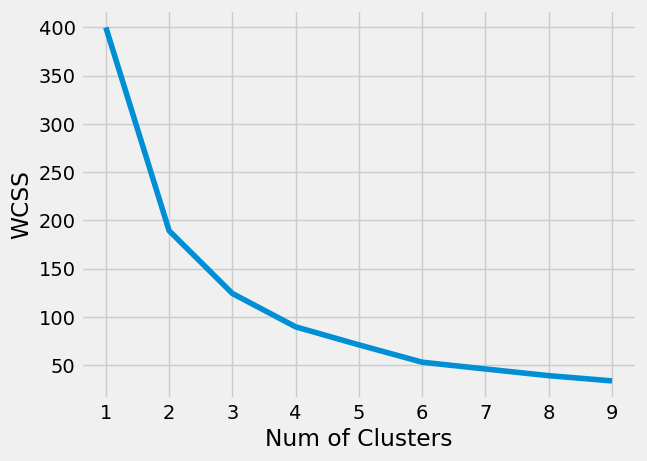

In [25]:
#Plotting WCSS and Num of clusters
num_clusters = range(1,10)
plt.plot(num_clusters, WCSS2)
plt.xlabel("Num of Clusters")
plt.ylabel("WCSS")
plt.show()

In [26]:
# Fitting KMeans with 3 clusters
Kmeans2 = KMeans(3,random_state=42)
Kmeans2.fit(Age_s_scaled)
x["Cluster2"] = Kmeans2.fit_predict(Age_s_scaled)
x[:5]

,Age,Annual Income (k$),Spending Score (1-100),Clusters,Cluster2
0,19,15,39,0,2
1,21,15,81,0,0
2,20,16,6,0,2
3,23,16,77,0,0
4,31,17,40,0,2


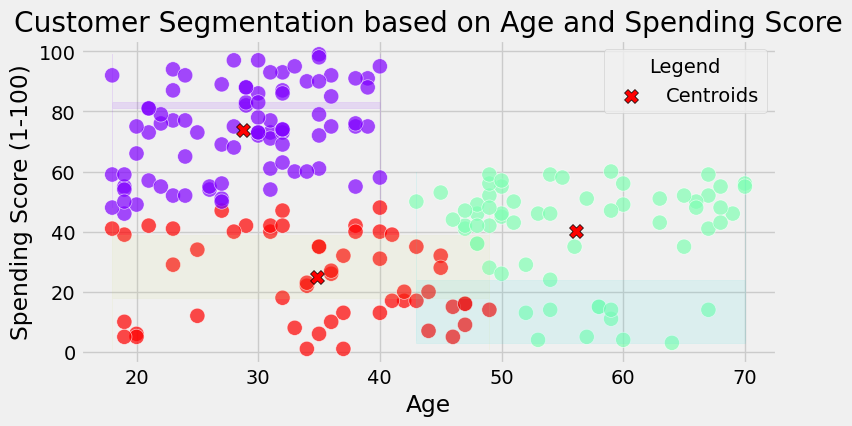

In [27]:
# Create and fit the StandardScaler
scaler = StandardScaler()
scaler.fit(Age_s)

# Transform the centroids back to the original scale
centroids_unscaled = scaler.inverse_transform(Kmeans2.cluster_centers_)

# Plotting the Scatter with Centroids and Shadows using unscaled features
plt.figure(figsize=(8, 4))

# Scatter plot with unscaled features
scatter = plt.scatter(x["Age"], x["Spending Score (1-100)"], c=x["Cluster2"],s=120, cmap="rainbow", alpha=0.7, edgecolors="w", linewidth=0.5)

# Plotting unscaled centroids
plt.scatter(centroids_unscaled[:, 0], centroids_unscaled[:, 1], c='red', marker='X', s=100, label='Centroids', edgecolors='black', zorder=10)

# Plotting shadows
for cluster_label in x['Cluster2'].unique():
    cluster_points = x[x['Cluster2'] == cluster_label][['Age', 'Spending Score (1-100)']]
    plt.fill_betweenx(cluster_points['Spending Score (1-100)'], cluster_points['Age'].min(), cluster_points['Age'].max(),
                      alpha=0.1, color=plt.cm.rainbow(cluster_label / len(centroids_unscaled)))

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation based on Age and Spending Score")

# Add legend
plt.legend(title="Legend")

# Show plot
plt.show()

There are 3 cluster were found. The details of segments are :
1. Cluster 1 : Age 18-48, Spending Score 1-44
    - Description : Customer in this group most are young adults aged between 18 and 48 yo, with lower spending score. It indicated if they are might be conservative with theie expenses or prefers budget friendly option.
    - Suggestion : targeting market to this cluster focusing on budget friendly product or discount to several product.

2. Cluster 2 : Age 18-40, Spending Score 44-100
    - Description : This group consists of younger customers, aged between 18 and 40. They have higher spending scores, indicating their willingness to invest in products and services. Additionally, they show greater engagement and interest in the offerings.
    - Suggestion : Targeted marketing campaigns focusing on stylish and luxurious products or unique experiences might appeal to this particular group of customers.

3. Cluster 3 : Age 45-70, Spending Score 1-60
    - Description : This group comprises older customers, aged between 45 and 70. They exhibit moderate spending scores, suggesting a more discerning approach to their purchases to avoid excessive spending.
    - Suggestion : This customer group consists of older people, aged between 45 and 70 years. They showed moderate spending scores, indicating a more thoughtful approach to purchasing and a tendency to avoid overspending.



#### CONCLUTION

This analysis provides important information about how customers are grouped and behave. These identified clusters can help companies create specific marketing plans that cater to different customer groups. Additionally, the interactive visualizations help us understand the complicated patterns in the data.

This exploration sets the groundwork for more in-depth analyses and strategic decision-making in marketing and customer interactions.